# D502 Capstone Python Code John D. Pickering
**Project Hypothesis** 
- Commander cards with efficient mana value, focused color identity, and utility-generating abilities such as card draw and evasion are more likely to perform well, as reflected in EDHREC rankings.

**Project Question**
- Which card-level attributes such as mana value, color identity, and keyword abilities are most predictive of Commander strength, as reflected by EDHREC popularity rankings?

**Magic: The Gathering, Commander**
In the Commander format, each deck is built around a legendary creature called the Commander, which begins the game in a special zone and can be cast repeatedly throughout the match.


What is Magic The Gathering:   
Magic: The Gathering is a strategic collectible card game where players build customized decks and use resource management, tactics, and card synergies to outplay their opponents in competitive matches. 

What is Magic The Gathering Commander:   
Commander is a popular multiplayer format of Magic: The Gathering where each player builds a 100-card deck led by a legendary creature known as the “Commander.” Decks are singleton (only one of each card allowed, except basic lands) and must match the color identity of the Commander. The format emphasizes creativity, social interaction, and long-term strategy.


## Core Traits of Magic: The Gathering Commander Format

**Mana**  
- Mana Value represents the total amount of mana — the magical energy used to cast spells — required to play that card during a game.
- Low mana values (1–3) often mean the Commander can be played within the first few turns, allowing early pressure or value generation.
- Mid-range mana values (4–5) strike a balance between early presence and powerful abilities.
- High mana values (6–9+) typically belong to powerful Commanders, but they come with a risk: it may take several turns to build up enough resources to cast them. In a multiplayer setting where games can shift quickly, this delay can be costly.
- In the context of this project, mana value is a key predictor of Commander strength: lower-cost Commanders often appear higher in EDHREC popularity rankings because they offer faster deployment, more consistent gameplay, and resilience against disruption. However, some high-cost Commanders still rank well if their effects are game-defining or if the deck can ramp up mana quickly.

**Color Identity**
- In the Commander format, a card’s color identity determines the colors of mana that can appear anywhere on the card, including its mana cost and ability text.
- This identity directly controls which other cards are allowed in the Commander’s deck: all 99 other cards must match the Commander’s color identity.
- Color identity ranges from:  
    - Mono-color (1 color) — Simpler, more consistent mana base, but narrower card pool.
    - Multicolor (2–4 colors) — Increases deck flexibility, synergy potential, and access to more powerful combinations, but complicates mana generation and deck consistency.
    - Five-color (WUBRG) — Provides access to the entire card pool, allowing the most powerful synergies, but is the hardest to build and play effectively.
- In modeling terms, color count is a proxy for a Commander’s potential versatility — but more is not always better. Success depends not just on color identity breadth, but how well a Commander’s colors align with support cards and strategies in the format.

**Keywords**
- Keyword abilities are predefined, shorthand terms in Magic: The Gathering that bundle complex rules into single words or phrases (e.g., flying, lifelink, haste).
- These mechanics influence how cards interact in combat, how much value they generate, and how well they support a player’s overall strategy.
- In Commander, these abilities amplify a Commander’s utility:
    - Combat abilities like flying, trample, or deathtouch help a Commander deal damage reliably, bypass blockers, or remove threats.
    - Value-generating abilities such as draw card, tutor (search your library), or create treasure enhance a player’s resources and flexibility.
    - Survivability traits like lifelink, indestructible, or hexproof help a Commander stay on the board longer and withstand removal.
- Popular Commanders often feature a combination of these traits, allowing them to act as engines for advantage while also supporting their deck’s theme.

**EDHREC**
- EDHREC (https://edhrec.com) is the leading data aggregator for the Commander format, compiling decklists from thousands of player submissions and online deck-building platforms.
- It uses this data to measure how frequently individual cards — particularly Commanders — are included in real-world decks.
- The edhrecRank variable in this dataset represents a popularity ranking of each Commander. A lower number indicates a more popular Commander, meaning it appears in more decklists. For example:
    - edhrecRank = 1 → Most commonly played Commander
    - edhrecRank = 500 → Less commonly played
- In this project, edhrecRank serves as the primary target variable for modeling. It acts as a proxy for Commander strength, under the assumption that cards chosen most frequently by the player community tend to perform well, be enjoyable to play, or fit into diverse deck strategies.
- While not a direct performance metric like win rate, popularity rankings reflect a blend of power, versatility, and community preference, making them ideal for analyzing card-level features that contribute to successful Commander design.

**Saltiness**
- In Commander, “saltiness” refers to the frustration or negative emotional reaction a card can evoke during gameplay, often because it’s disruptive, hard to interact with, or perceived as unfair.
- EDHREC captures this sentiment using user-submitted feedback, aggregating votes into a edhrecSaltiness score for each card. The score is numerical, with higher values indicating more frequent complaints or negative reactions. For example:
- A card with saltiness = 0.10 may be viewed as slightly annoying.
- A card with saltiness = 1.20 is often considered oppressive or unfun.
- Cards with extra turns, mass land destruction, or stax-like effects (locking down opponents) often rank high in saltiness.
- In my analysis, this variable serves two purposes:
    - It acts as a descriptive measure, helping to explain community sentiment around certain cards.
    - It can be used as a feature in modeling — to explore whether cards that are more “salty” tend to be more or less popular.


### Import Project Dependencies  

In [ ]:
import json
import csv
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import ast
import numpy as np
import shap
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from collections import Counter 
from sklearn.linear_model import LogisticRegression

### Import and Review Dataset

In [4]:
# Read dataset into pandas Low memory to keep warnings away.  
df = pd.read_csv('D502/cards.csv', low_memory=False)

In [6]:
# Check database shape. 
# This ensures the dataset imported correctly and gives me an overview of size. 
num_rows = df.shape[0]
num_cols = df.shape[1]

print(f'There are {num_rows} rows in the dataset')
print(f'There are {num_cols} columns in the dataset')

There are 102939 rows in the dataset
There are 79 columns in the dataset


In [8]:
# Check columns, type, and null count. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102939 entries, 0 to 102938
Data columns (total 79 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   artist                   102475 non-null  object 
 1   artistIds                102475 non-null  object 
 2   asciiName                245 non-null     object 
 3   attractionLights         135 non-null     object 
 4   availability             102939 non-null  object 
 5   boosterTypes             52330 non-null   object 
 6   borderColor              102939 non-null  object 
 7   cardParts                18 non-null      object 
 8   colorIdentity            91698 non-null   object 
 9   colorIndicator           896 non-null     object 
 10  colors                   80883 non-null   object 
 11  defense                  55 non-null      float64
 12  duelDeck                 1594 non-null    object 
 13  edhrecRank               94872 non-null   float64
 14  edhr

### Initial Data Cleaning/Transformation

In [10]:
# Check null values by columns
missing = df. isnull().sum().sort_values(ascending=False)

# Get mostly_null by using the missing data * len of dataset. 
mostly_null = missing[missing > 0.95 * len(df)]
print('Columns with 95% missing values')
print(missing)

Columns with 95% missing values
cardParts            102921
faceFlavorName       102912
hasContentWarning    102910
defense              102884
relatedCards         102879
                      ...  
hasFoil                   0
setCode                   0
frameVersion              0
printings                 0
rarity                    0
Length: 79, dtype: int64


In [12]:
# Drop columms with over 95% of the data missing
df = df.drop(columns=mostly_null.index)
print('The columns have been dropped')

The columns have been dropped


In [14]:
# Check for duplicates within the UUID Column.  This is a unique card identifier and there should be no unique UUID's. 
num_duplicates = df.duplicated(subset='uuid').sum()

# Remove duplicates
if num_duplicates > 0:
    print(f'Found and removing {num_duplicates} duplicate cards.')
    df_cleaned = df_cleaned.drop_duplicates(subset='uuid'.reset_index(drop=True))
else:
    print('No duplicates found')
    

No duplicates found


In [16]:
# View Dataset
# Lots of excess columns. I'll cut that back in the next section. 
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
artist,Pete Venters,Pete Venters,Volkan Baǵa,Volkan Baǵa,Mark Zug,Mark Zug,Jim Murray,John Avon,John Avon,D. Alexander Gregory,Justin Sweet,Justin Sweet,Matthew D. Wilson,Rebecca Guay,Rob Alexander,Zoltan Boros & Gabor Szikszai,Zoltan Boros & Gabor Szikszai,Steven Belledin,Daren Bader,Christopher Rush
artistIds,d54c4a1a-c0c5-4834-84db-125d341f3ad8,d54c4a1a-c0c5-4834-84db-125d341f3ad8,93bec3c0-0260-4d31-8064-5d01efb4153f,93bec3c0-0260-4d31-8064-5d01efb4153f,48e2b98c-5467-4671-bd42-4c3746115117,48e2b98c-5467-4671-bd42-4c3746115117,1c906f9b-5bbe-4643-8f5c-90eb1c7f0c43,798f3932-30e0-4420-aa3f-db4d613f89ca,798f3932-30e0-4420-aa3f-db4d613f89ca,38433e15-f0f5-4223-a985-2d13c4aa0922,bb15780e-8f96-4823-b258-a7a9fd79b02c,bb15780e-8f96-4823-b258-a7a9fd79b02c,4fbafd13-0cf9-42a1-870d-7f8ea276f140,f8f662fa-d597-46a3-afb2-91d6e13243e2,35906871-6c78-4ab2-9ed1-e6792c8efb74,"1885e6cb-c827-4896-994e-3d0a027d602f, 44c3877f...","1885e6cb-c827-4896-994e-3d0a027d602f, 44c3877f...",f07d73b9-52a0-4fe5-858b-61f7b42174a5,7da1a585-c875-45e4-b322-5da9e8e1f651,c96773f0-346c-4f7d-9271-2d98cc5d86e1
availability,"mtgo, paper","mtgo, paper","mtgo, paper","mtgo, paper","mtgo, paper","mtgo, paper","mtgo, paper","mtgo, paper","mtgo, paper","mtgo, paper","mtgo, paper","mtgo, paper","mtgo, paper","mtgo, paper","mtgo, paper","mtgo, paper","mtgo, paper","mtgo, paper","mtgo, paper","mtgo, paper"
boosterTypes,default,default,default,default,default,default,default,default,default,default,default,default,default,default,default,default,default,default,default,default
borderColor,black,black,black,black,black,black,black,black,black,black,black,black,black,black,black,black,black,black,black,black
colorIdentity,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W
colors,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W
edhrecRank,22848.0,22848.0,18071.0,18071.0,24355.0,24355.0,5949.0,7472.0,7472.0,1666.0,19102.0,19102.0,21244.0,9866.0,3323.0,22331.0,22331.0,16964.0,4192.0,14045.0
edhrecSaltiness,NaN,NaN,0.12,0.12,0.12,0.12,0.33,NaN,NaN,1.23,0.36,0.36,NaN,NaN,0.49,NaN,NaN,0.12,0.35,NaN
finishes,nonfoil,foil,nonfoil,foil,nonfoil,foil,"nonfoil, foil",nonfoil,foil,"nonfoil, foil",nonfoil,foil,"nonfoil, foil","nonfoil, foil","nonfoil, foil",nonfoil,foil,"nonfoil, foil","nonfoil, foil","nonfoil, foil"


In [18]:
# Create dataset wtih just the data I'll need for the analysis. 
# Through earlier review of the dataset prior to import I deteed which colurminmns would be necessary for analysis and will drop those that not needed.
#final_columns = ['uuid', 'name', 'manaCost', 'manaValue', 'colors', 'colorIdentity', 'type', 'types', 'subtypes', 'power',
#                 'toughness', 'text', 'keywords', 'edhrecRank', 'edhrecSaltiness', 'leadershipSkills']
final_columns = ['uuid', 'name', 'manaCost', 'manaValue', 'colors', 'colorIdentity', 'type', 'types', 'subtypes', 'power',
                 'toughness', 'text', 'keywords', 'edhrecRank', 'edhrecSaltiness', 'leadershipSkills']
df = df[final_columns]

In [22]:
# View Dataset
# Observations
# It looks like there are name duplicates.  
# ManaCost will need to be broken out to individual columns
# Keywords will need to be broken out into their own columns for analysis. 
# text will need to be cleaned up and abilities broken out of the text. 
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
uuid,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,b7c19924-b4bf-56fc-aa73-f586e940bd42,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,55bd38ca-dc73-5c06-8f80-a6ddd2f44382,c5655330-5131-5f40-9d3e-0549d88c6e9e,3b77bb52-4181-57f5-b3cd-f3a15b95aa29,fadda48c-6226-5ac5-a2b9-e9170d2017cd,60b93108-8790-591b-844e-c3d311698767,fac6ad26-f8c2-51bd-9f6a-a1b0940b4cef,8ac972b5-9f6e-5cc8-91c3-b9a40a98232e,6adaf14d-43e3-521a-adf1-960c808e5b1a,a69b404f-144a-5317-b10e-7d9dce135b24,6d268c95-c176-5766-9a46-c14f739aba1c,56f4935b-f6c5-59b9-88bf-9bcce20247ce,62365fbb-af07-5c2a-976d-e3092bdfc317,0d2a4e1d-cc12-5675-8044-9a7bc7d60050,81daea6a-2735-5a46-a2da-b65a2ad5738f,7fef665c-36a1-5f7a-9299-cf8938708710,2f9c211e-1869-5b3f-94ea-f73b7910a5af
name,Ancestor's Chosen,Ancestor's Chosen,Angel of Mercy,Angel of Mercy,Angelic Blessing,Angelic Blessing,Angelic Chorus,Angelic Wall,Angelic Wall,Aura of Silence,Aven Cloudchaser,Aven Cloudchaser,Ballista Squad,Bandage,Beacon of Immortality,Benalish Knight,Benalish Knight,"Cho-Manno, Revolutionary",Condemn,Demystify
manaCost,{5}{W}{W},{5}{W}{W},{4}{W},{4}{W},{2}{W},{2}{W},{3}{W}{W},{1}{W},{1}{W},{1}{W}{W},{3}{W},{3}{W},{3}{W},{W},{5}{W},{2}{W},{2}{W},{2}{W}{W},{W},{W}
manaValue,7.0,7.0,5.0,5.0,3.0,3.0,5.0,2.0,2.0,3.0,4.0,4.0,4.0,1.0,6.0,3.0,3.0,4.0,1.0,1.0
colors,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W
colorIdentity,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W,W
type,Creature — Human Cleric,Creature — Human Cleric,Creature — Angel,Creature — Angel,Sorcery,Sorcery,Enchantment,Creature — Wall,Creature — Wall,Enchantment,Creature — Bird Soldier,Creature — Bird Soldier,Creature — Human Rebel,Instant,Instant,Creature — Human Knight,Creature — Human Knight,Legendary Creature — Human Rebel,Instant,Instant
types,Creature,Creature,Creature,Creature,Sorcery,Sorcery,Enchantment,Creature,Creature,Enchantment,Creature,Creature,Creature,Instant,Instant,Creature,Creature,Creature,Instant,Instant
subtypes,"Human, Cleric","Human, Cleric",Angel,Angel,NaN,NaN,NaN,Wall,Wall,NaN,"Bird, Soldier","Bird, Soldier","Human, Rebel",NaN,NaN,"Human, Knight","Human, Knight","Human, Rebel",NaN,NaN
power,4,4,3,3,NaN,NaN,NaN,0,0,NaN,2,2,2,NaN,NaN,2,2,2,NaN,NaN


In [24]:
# Drop duplicate commander names, keeping the first occurrence
# There are duplicate names becase cards are re-relesed and setup with a new UUID but not a new name, all values are the same. 
df = df.drop_duplicates(subset='name', keep='first')

In [26]:
df = df.copy()

# Fill missing leadership data
df['leadershipSkills'] = df['leadershipSkills'].fillna('{}')

# Parse JSON and extract the fields
leadership_cols = df['leadershipSkills'].apply(json.loads).apply(pd.Series)
leadership_cols = leadership_cols.rename(columns={
    'commander': 'is_commander',
    'brawl': 'is_brawl',
    'oathbreaker': 'is_oathbreaker'
})

# Drop any pre-existing columns that might conflict
df = df.drop(columns=['is_commander', 'is_brawl', 'is_oathbreaker'], errors='ignore')

# Concatenate cleanly
df = pd.concat([df, leadership_cols], axis=1)

In [28]:
# Review the three new colums. 
df[['leadershipSkills', 'is_brawl', 'is_commander', 'is_oathbreaker']].sample(25)

,leadershipSkills,is_brawl,is_commander,is_oathbreaker
10040,{},NaN,NaN,NaN
8050,{},NaN,NaN,NaN
48767,"{""brawl"": false, ""commander"": true, ""oathbreak...",False,True,False
11884,{},NaN,NaN,NaN
60543,{},NaN,NaN,NaN
89769,{},NaN,NaN,NaN
59081,{},NaN,NaN,NaN
56465,{},NaN,NaN,NaN
23659,{},NaN,NaN,NaN
51928,{},NaN,NaN,NaN


In [30]:
# Make sure edhrecRank is numberic then filter out where commander/edhrecrank is null

# Check for duplicated columns
df = df.loc[:, ~df.columns.duplicated()]
# Convert edhrecRank to ensure all values are numeric. The field must be numeric for analysis.
df.loc[:, 'edhrecRank'] = pd.to_numeric(df['edhrecRank'], errors='coerce')
# Filter out rows without valid edhrecRank
df = df[df['is_commander'] | df['edhrecRank'].notnull()]

In [32]:
# Drop rows with null edhrecRank
# Based on the above visual a check has been added for edhrec rank.  As it's one of the variables it cannot be null. 
df.dropna(subset=['edhrecRank'], inplace=True)

In [34]:
# parse the mana cost of Magic: The Gathering cards 
# to extract color-specific and generic mana symbol counts, which can then be used as features in analysis or modeling.
df = df.copy()

# Extract mana symbols
df['mana_symbols_list'] = df['manaCost'].fillna('').apply(
    lambda x: re.findall(r'\{(.*?)\}', x))

# Create list of mana cost
def count_color_symbols(symbols):
    counts = Counter(symbols)
    return pd.Series({
        'num_W': counts.get('W', 0),
        'num_U': counts.get('U', 0),
        'num_B': counts.get('B', 0),
        'num_R': counts.get('R', 0),
        'num_G': counts.get('G', 0),
        'num_generic': sum(1 for s in symbols if s.isdigit())
    })

df_color_counts = df['mana_symbols_list'].apply(count_color_symbols)
df = pd.concat([df, df_color_counts], axis=1)

In [36]:
# Show new Mana columns and color columns
df[['mana_symbols_list', 'manaCost', 'num_W', 'num_U', 'num_B', 'num_R', 'num_G', 'num_generic']].sample(10)

,mana_symbols_list,manaCost,num_W,num_U,num_B,num_R,num_G,num_generic
21295,"[3, W]",{3}{W},1,0,0,0,0,1
1580,"[G, W, U, B]",{G}{W}{U}{B},1,1,1,0,1,0
100644,"[U, B]",{U}{B},0,1,1,0,0,0
91938,"[4, B, B]",{4}{B}{B},0,0,2,0,0,1
11430,"[3, B, B]",{3}{B}{B},0,0,2,0,0,1
1014,"[4, U, B]",{4}{U}{B},0,1,1,0,0,1
12803,"[4, U]",{4}{U},0,1,0,0,0,1
44805,"[2, G, W]",{2}{G}{W},1,0,0,0,1,1
34067,"[G, W]",{G}{W},1,0,0,0,1,0
40227,"[2, R]",{2}{R},0,0,0,1,0,1


In [38]:
# Identify and drop columns related to mana costs that contain null (missing) values from the df_commander_legal dataframe.
# Done to prevent any null values downstream. 
mana_columns = [col for col in df.columns if 'mana' in col.lower()]
# Check for null values
mana_columns_with_nulls = [col for col in mana_columns if df[col].isnull().any()]

# Drop null values. 
df = df.drop(columns=mana_columns_with_nulls)

# Print message that process completed. 
print("Dropped mana-related columns due to nulls:", mana_columns_with_nulls)

Dropped mana-related columns due to nulls: ['manaCost']


In [40]:
# One last commander_legal check.
# Filter to only commander-legal cards
df = df[df['is_commander'] == True].copy()

# Handle missing values in color identity
df['colorIdentity'] = df['colorIdentity'].fillna('None')

# Generate the color_count column (cleaning spaces just in case)
df['color_count'] = df['colorIdentity'].apply(
    lambda x: len([c.strip() for c in x.split(',')]) if x != 'None' else 0
)

In [42]:
# Create a Commander only copy of the dataset
df_commander_legal = df.copy()

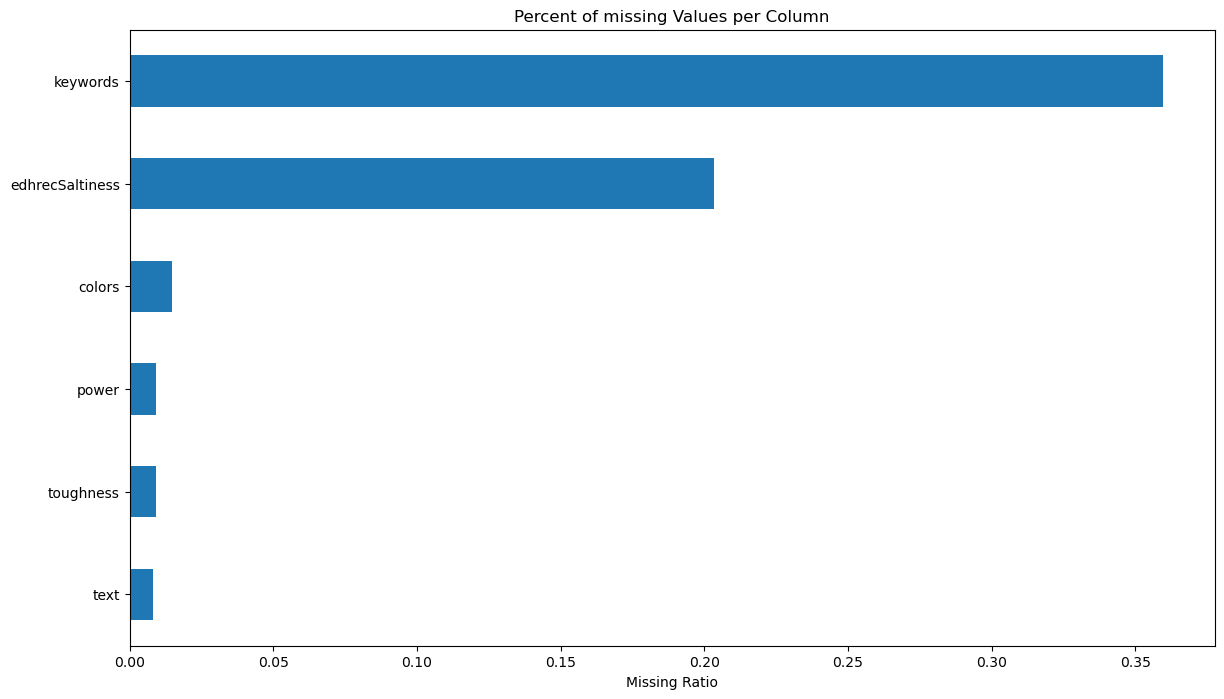

In [44]:
# Show missing data by column in percent.  
null_pct = df_commander_legal.isnull().mean().sort_values(ascending=False)
# Get null % Greater than zero for barchart.
null_pct = null_pct[null_pct > 0]

# Generate the barchart. 
plt.figure(figsize=(14, 8))
null_pct.plot(kind='barh')
plt.title("Percent of missing Values per Column")
plt.xlabel("Missing Ratio")
plt.gca().invert_yaxis()
plt.show()


## Feature Engineering

**Keyword Extraction Summary**  
- This is the main feature engineering process.  I have a detailed write-up below the function. 

In [50]:
from pandas.api.types import is_numeric_dtype, is_bool_dtype
import pandas as pd

def create_features(df_commander_legal):
    

    # 1. Fill in nulls with None
    df_commander_legal['keywords'] = df_commander_legal['keywords'].fillna('None')
    df_commander_legal['keywords_clean'] = df_commander_legal['keywords'].str.lower()
    df_commander_legal['colorIdentity'] = df_commander_legal['colorIdentity'].fillna('None')
    df_commander_legal['text_clean'] = df_commander_legal['text'].fillna('').str.replace('\n', '', regex=False).str.lower()

    # 2. Flag card types.  
    df_commander_legal['is_creature'] = df_commander_legal['types'].str.contains('Creature', case=False, na=False)
    df_commander_legal['is_planeswalker'] = df_commander_legal['type'].str.contains('Planeswalker', na=False)
    df_commander_legal['is_enchantment'] = df_commander_legal['type'].str.contains('Enchantment', na=False)
    df_commander_legal['is_artifact'] = df_commander_legal['type'].str.contains('Artifact', na=False)
    df_commander_legal['is_tribal'] = df_commander_legal['type'].str.contains('Tribal', na=False)
    df_commander_legal['is_instant_or_sorcery'] = df_commander_legal['type'].str.contains('Instant|Sorcery', na=False)

    # 3. Create Saltiness (Community Perception)
    df_commander_legal['has_saltiness'] = df_commander_legal['edhrecSaltiness'].notnull()
    df_commander_legal['is_salty'] = df_commander_legal['edhrecSaltiness'].fillna(0) > 1.0

    # 4. Create has_partner
    df_commander_legal['has_partner'] = df_commander_legal['keywords_clean'].str.contains('partner')

    # 5. Create summary fields for visuals.
    df_commander_legal['card_summary'] = df_commander_legal['name'] + ' — ' + df_commander_legal['type']

    # 6. Create mana features and color counts
    df_commander_legal['color_count'] = df_commander_legal['colorIdentity'].apply(
        lambda x: len(str(x).split(',')) if x != 'None' else 0
    )
    df_commander_legal['high_cost'] = df_commander_legal['manaValue'] >= 6
    mana_cols = ['num_W', 'num_U', 'num_B', 'num_R', 'num_G', 'num_generic']
    df_commander_legal['mana_symbol_total'] = df_commander_legal[mana_cols].sum(axis=1)
    df_commander_legal['mana_complexity'] = df_commander_legal['mana_symbol_total'] / df_commander_legal['color_count'].replace(0, 1)

    # 7. Color Identity Features
    df_commander_legal['is_monocolor'] = df_commander_legal['color_count'] == 1
    df_commander_legal['is_multicolor'] = df_commander_legal['color_count'] > 1
    df_commander_legal['is_wubrg'] = df_commander_legal['colorIdentity'].apply(lambda x: set(str(x)) == set('WUBRG'))
    df_commander_legal['num_colors'] = df_commander_legal[['num_W', 'num_U', 'num_B', 'num_R', 'num_G']].gt(0).sum(axis=1)

    # 8. Text and Keyword-Based Ability Extraction
    ability_patterns = {
        'draw': ['draw'],
        'ramp': ['add', 'treasure token'],
        'destroy': ['destroy'],
        'lifelink': ['lifelink'],
        'flying': ['flying'],
        'haste': ['haste'],
        'indestructible': ['indestructible'],
        'hexproof': ['hexproof'],
        'ward': ['ward'],
        'protection': ['protection from'],
        'first_strike': ['first strike'],
        'double_strike': ['double strike'],
        'menace': ['menace'],
        'vigilance': ['vigilance'],
        'trample': ['trample'],
        'tutor': ['search your library'],
        'mill': ['mill'],
        'create_treasure': ['create a treasure', 'treasure token'],
        'graveyard_return': ['return target', 'graveyard'],
        'token_generation': ['create a', 'token'],
        'lose_life': ['lose life', 'lose x life'],
        'gain_life': ['gain life', 'gain x life']
    }

    def has_ability(row, phrases):
        kw_text = row['keywords_clean']
        rule_text = row['text_clean']
        return any(p in kw_text or p in rule_text for p in phrases)

    for ability, phrases in ability_patterns.items():
        col = f'has_{ability}'
        df_commander_legal[col] = df_commander_legal.apply(lambda row: has_ability(row, phrases), axis=1)

    # 9. Dynamically extract modeling features into a variable (final_features)
    potential_features = [
        col for col in df_commander_legal.columns
        if (
            col.startswith('has_') or
            col.startswith('is_') or
            col.startswith('mana_') or
            col in ['color_count', 'manaValue']
        )
    ]

    modeling_features = [
        col for col in potential_features
        if is_numeric_dtype(df_commander_legal[col]) or is_bool_dtype(df_commander_legal[col])
    ]

    return df_commander_legal, modeling_features
df_commander_legal, final_features = create_features(df_commander_legal)

**Feature Engineering Steps**
- In step 2, I generate binary flags to indicate whether a card belongs to key card types such as Creature, Planeswalker, Enchantment, Artificate, Tribal, or Instant/Sorcery.

- Step 3 adds features related to EDHREC saltiness, a community-driven measure of how frustrating or unfun a card is perceived to be in Commander games. The has_saltiness flag simply records whether a card has a saltiness rating at all, which can indicate broader community recognition or usage. The is_salty flag is more specific — it identifies cards with a saltiness score greater than 1.0, a threshold that often corresponds to cards considered oppressive, annoying, or overpowered in casual play. These features help introduce a human sentiment signal into the model, allowing it to account for not just mechanics but also how players feel about certain cards

- In Step 4, I created a binary flag called has_partner that identifies whether a card includes the “Partner” keyword. This unique mechanic in Commander allows players to use two commanders instead of one, provided both have the Partner ability. This mechanic greatly expands deck-building options and strategy diversity, as it combines colors, themes, and effects in flexible ways that are impossible with a single Commander

- Step 5 creates a new field called card_summary by combining each card's name with its type (e.g., "Atraxa, Praetors' Voice — Creature"). While this field is not used directly for modeling, it plays a valuable role in data visualization, reporting, and interpretation. 

- Step 6 constructs several features related to a card’s mana cost and complexity, which are central to gameplay pacing and deck-building constraints. The high_cost flag identifies Commanders with a mana value of 6 or more, often associated with powerful but slower cards. This helps the model differentiate between early-game and late-game strategies.

- Step 7 engineers features that describe a card's color identity, which is a fundamental constraint in Commander deck-building. The color_count feature records the number of distinct colors in a Commander’s identity — for example, a mono-white card has a color_count of 1, while a five-color Commander has a count of 5. From this, binary flags are created: is_monocolor and is_multicolor, which help differentiate simple versus complex color strategies. The is_wubrg flag specifically identifies five-color Commanders (using all colors: W, U, B, R, G).

- Step 8 extracts meaningful gameplay mechanics from the text field — the detailed card rules — and converts them into binary flags. These include has_draw_card, has_tutor, has_mill, has_graveyard_return, has_exile, has_create_treasure, has_gain_life, and has_lose_life. While not all of these are formal keyword abilities, they reflect functional actions commonly performed by Commander cards.

- Step 9 dynamically identifies and extracts all columns in the dataset that are suitable for modeling based on their prefix and data type. It filters for columns that begin with has_, is_, or mana_, along with core features like color_count and manaValue, then ensures they are either numeric or boolean. This strategy creates a flexible and scalable feature set.

In [53]:
# Check Shape one last time.  
df_commander_legal.shape

(2419, 67)

In [55]:
# Save dataset to local drive
df_commander_legal.to_csv('D502/mtg_commander_cleaned.csv', index=False)

## Explortary Data Analysis

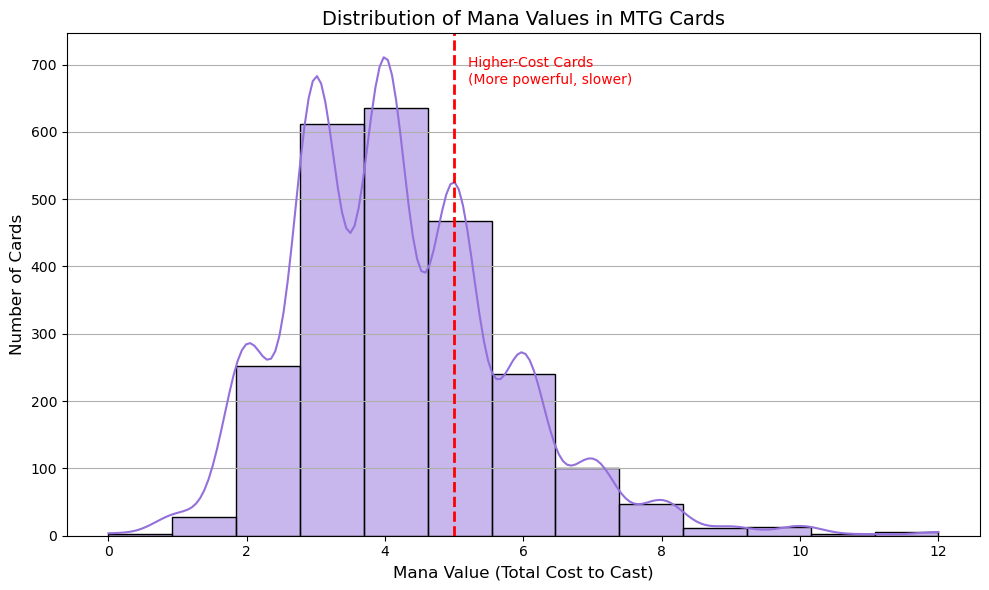

In [57]:
# Check for mana value within the MTG Commander Legal Cards. 
df_mv = df_commander_legal[df_commander_legal['manaValue'].between(0, 12) & df_commander_legal['manaValue'].notnull()]

# Plot histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df_mv['manaValue'], bins=13, kde=True, color='mediumpurple', edgecolor='black')

# Add vertical line to separate low vs high mana value (threshold at 5)
threshold = 5
plt.axvline(threshold, color='red', linestyle='--', linewidth=2)
plt.text(threshold + 0.2, plt.ylim()[1] * 0.9, 'Higher-Cost Cards\n(More powerful, slower)', color='red')

# Title and labels
plt.title('Distribution of Mana Values in MTG Cards', fontsize=14)
plt.xlabel('Mana Value (Total Cost to Cast)', fontsize=12)
plt.ylabel('Number of Cards', fontsize=12)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


**Histogram Summary**  
The histogram is shwoing distribution of mana values across Commander-legal MTG cards. Most cards cluster around a mana value of 3 to 5, with a sharp decline in frequency beyond 6. The red vertical line at mana value 5 highlights a general threshold between lower-cost and higher-cost cards which is a key distinction in gameplay. Lower-cost cards tend to be faster and easier to cast, while higher-cost cards are typically more powerful but slower to deploy. Understanding this distribution helps contextualize whether the most popular Commanders in EDH skew toward efficiency, power, or a balance of both.

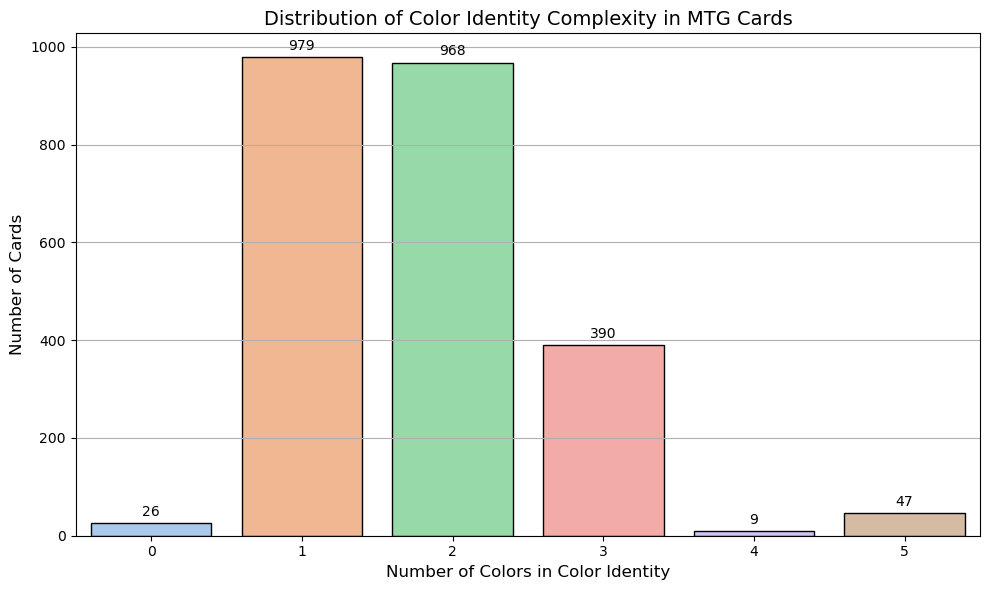

In [60]:
# Check color distribution among commander legal cards. 

plt.figure(figsize=(10, 6))
sns.countplot(data=df_commander_legal, x='color_count', hue='color_count', palette='pastel', edgecolor='black', legend=False)

# Add value labels on top of bars
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', padding=3)
    
# Format chart
plt.title('Distribution of Color Identity Complexity in MTG Cards', fontsize=14)
plt.xlabel('Number of Colors in Color Identity', fontsize=12)
plt.ylabel('Number of Cards', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Barchart Summary**  
The barchart displays the distribution of color identity complexity among Commander-legal MTG. The majority of cards have either one or two colors in their identity, suggesting that simpler color combinations are more common. Three-color cards are less frequent, while four- and five-color cards are rare. Because a card’s color identity determines what can be included in a Commander deck, this distribution highlights the relative rarity of high-complexity, multi-color options. It provides important context for evaluating how color flexibility may influence a Commander’s popularity or strategic viability.

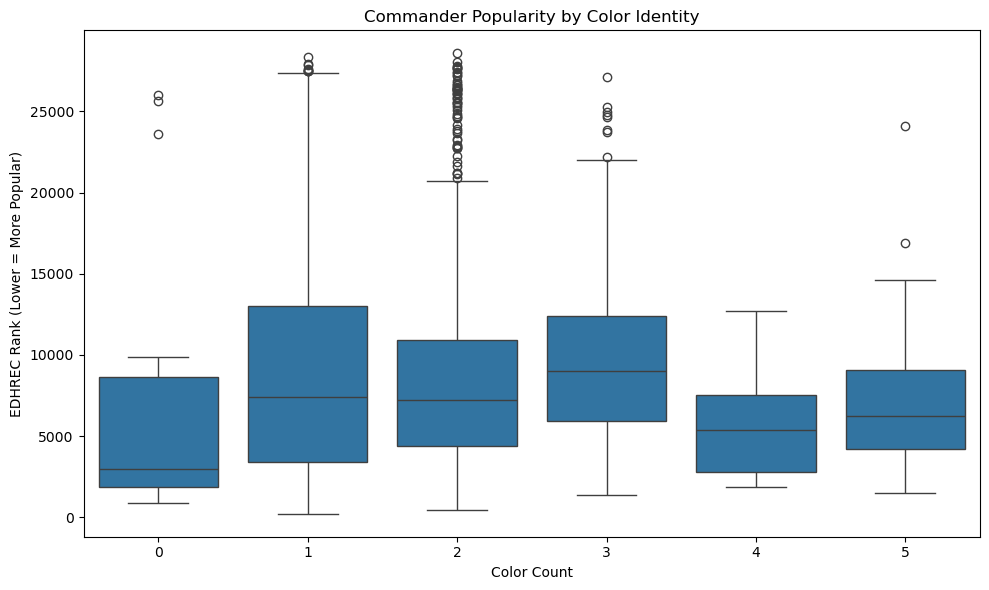

In [63]:
# Check Commander popularity by color vs. EDHREC Rankings.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_commander_legal[df_commander_legal['edhrecRank'].notnull()], x='color_count', y='edhrecRank')
plt.title('Commander Popularity by Color Identity')
plt.xlabel('Color Count')
plt.ylabel('EDHREC Rank (Lower = More Popular)')
plt.tight_layout()
plt.show()


**Box Plot Summary**  
The box plot illustrates how a commander's color identity count relates to its popularity on EDHREC (lower rank values = higher popularity). Colorless commanders (0 colors) show the lowest median ranks, indicating popularity and competitive performance. One and two color commanders display greater rank variability and higher medians, suggesting less consistent popularity across those groups. Interestingly, three and four-color commanders show more variance but slightly lower median ranks than 1 and 2-color peers, potentially due to stronger synergy potential. Five-color commanders stand out with relatively low median ranks and tighter IQRs, implying they are both powerful and broadly favored. Overall, popularity appears strongest at the extremes: simple color identities (0-color) and high-complexity identities (5-color).

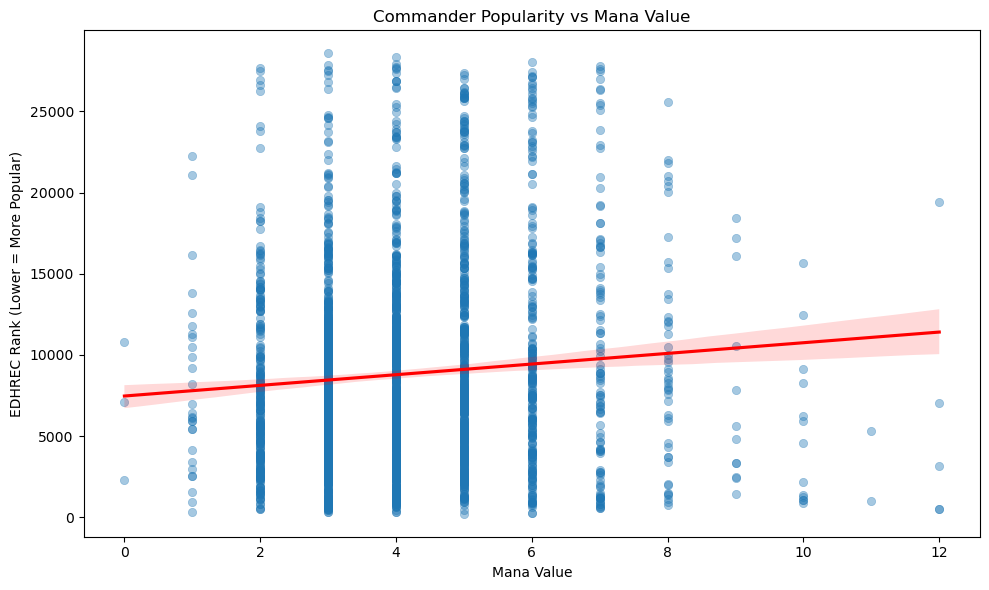

In [66]:
# Show scatter plot for commander popularity vs. Mana value by EDHREC Rankings. 
df_plot = df_commander_legal[df_commander_legal['edhrecRank'].notnull() & df_commander_legal['manaValue'].between(0, 12)]

# Plot: Mana Value vs EDHREC Rank
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='manaValue', y='edhrecRank', alpha=0.4, edgecolor=None)
sns.regplot(data=df_plot, x='manaValue', y='edhrecRank', scatter=False, color='red')
plt.title('Commander Popularity vs Mana Value')
plt.xlabel('Mana Value')
plt.ylabel('EDHREC Rank (Lower = More Popular)')
plt.tight_layout()
plt.show()

**Scatter Plot Summary**  
The scatterplot displays the relationship between a commander's mana value and its EDHREC popularity rank (with lower rank indicating higher popularity). While commanders exist across a wide mana range (0 to 12), the red trend line shows a modest upward slope, suggesting that commanders with higher mana values tend to be slightly less popular overall. This trend implies a general player preference for efficient commanders. However, the wide vertical spread at nearly every mana value—especially between 2 and 6—reveals that mana cost alone is not a strong predictor of popularity. The linear trend supports the idea that higher-cost commanders face a popularity disadvantage, possibly due to slower gameplay or higher deck-building constraints.

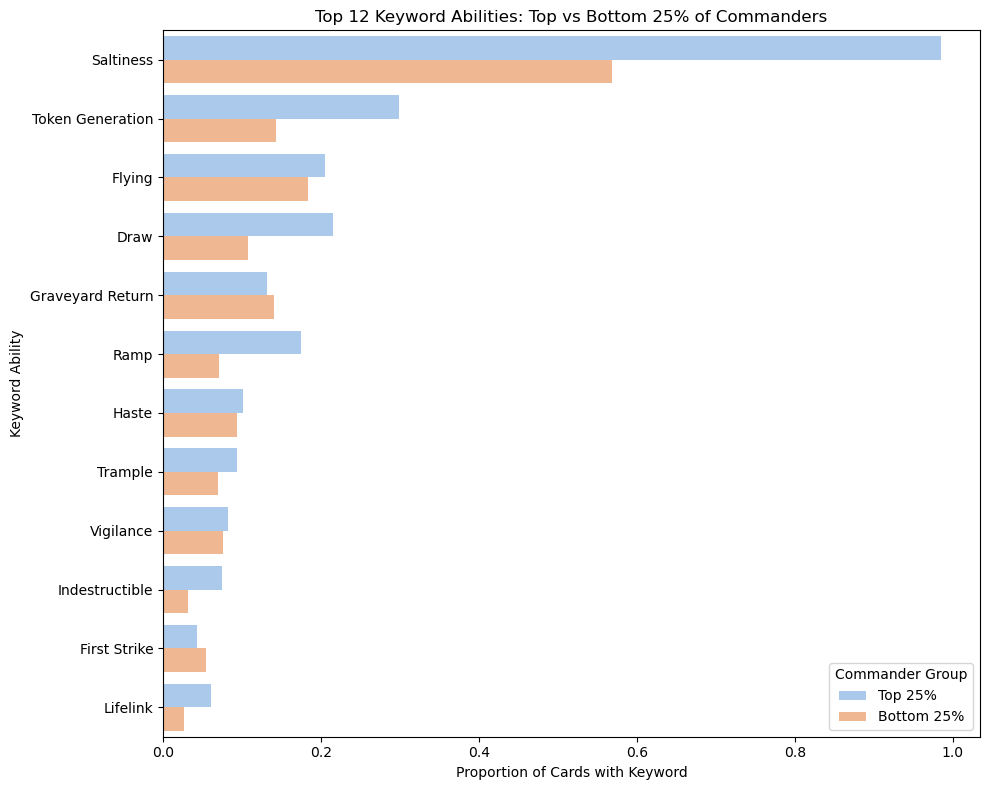

In [69]:
# Show popular keywords by top/bottom 25% of Commmanders. 

top_25 = df_commander_legal[df_commander_legal['edhrecRank'] <= df_commander_legal['edhrecRank'].quantile(0.25)]
bottom_25 = df_commander_legal[df_commander_legal['edhrecRank'] >= df_commander_legal['edhrecRank'].quantile(0.75)]

# Identify keyword columns
keyword_cols = [col for col in df_commander_legal.columns if col.startswith('has_') and df_commander_legal[col].dtype == 'bool']

# Calculate proportion of cards with each keyword
top_freq = top_25[keyword_cols].mean().rename('Top 25%')
bottom_freq = bottom_25[keyword_cols].mean().rename('Bottom 25%')

# Combine and reshape
keyword_df = pd.concat([top_freq, bottom_freq], axis=1).reset_index()
keyword_df.rename(columns={'index': 'Keyword'}, inplace=True)

# Clean labels
keyword_df['Keyword'] = keyword_df['Keyword'].str.replace('has_', '').str.replace('_', ' ').str.title()

# Keep top N keywords by total average presence
top_n = 12
keyword_df['Avg'] = keyword_df[['Top 25%', 'Bottom 25%']].mean(axis=1)
keyword_df = keyword_df.sort_values('Avg', ascending=False).head(top_n).drop(columns='Avg')

# Melt for plotting
keyword_long = keyword_df.melt(id_vars='Keyword', var_name='Commander Group', value_name='Frequency')

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=keyword_long, x='Frequency', y='Keyword', hue='Commander Group', palette='pastel')
plt.title('Top 12 Keyword Abilities: Top vs Bottom 25% of Commanders')
plt.xlabel('Proportion of Cards with Keyword')
plt.ylabel('Keyword Ability')
plt.tight_layout()
plt.show()


**Keyword Barchart Summary**  
The bar chart compares the prevalence of 12 key abilities among the top 25% and bottom 25% of commanders by EDHREC rank. Across the board, top-performing commanders consistently feature a higher proportion of impactful keyword abilities. Notably, “Saltiness” which is a proxy for powerful or frustrating card mechanics is far more common among top-tier commanders, suggesting that controversial or disruptive abilities often correlate with popularity. Similarly, abilities like Token Generation, Draw, Graveyard Return, and Ramp are more frequent among top-tier commanders, reinforcing the value of card advantage and resource acceleration. Even combat-focused traits like Flying, Haste, and Trample appear more often in successful commanders. Overall, this visualization suggests that commanders with utility, synergy, or game-altering effects are more likely to be ranked among the most popular in the format.

## Modeling  
- Linear Regression to demonstrate interpretability and show how each feature correlates with EDHREC rank
- Random Forest model to boost predictive accuracy and show that your approach adapts to non-linear complexity.

In [73]:
# Set the modeling data. (use final_features from feature engineering section) for LR and RF
# df_commander_legal = df_commander_legal[df_commander_legal['edhrecRank'].notna()].copy()
X = df_commander_legal[final_features].copy()
y = df_commander_legal['edhrecRank']

In [75]:
# Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale training and test data (Only for linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model on scaled training data
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predict and evaluate on test data
y_pred = linear_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Save LR metrics
linear_metrics = pd.DataFrame({
    'Model': ['Linear Regression'],
    'R_squared': [r2],
    'RMSE': [rmse]
})


# Run Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Save RF Metrics
rf_metrics = pd.DataFrame({
    'Model': ['Random Forest'],
    'R_squared': [r2_rf],
    'RMSE': [rmse_rf]
})

# Combine both model performance metrics to display.
combined_metrics = pd.concat([linear_metrics, rf_metrics], ignore_index=True)

# Display table (or print for scripts)
print(combined_metrics)



               Model  R_squared         RMSE
0  Linear Regression   0.282826  5203.737293
1      Random Forest   0.153504  5653.476213


**Summary**  
The goal of my project was to predict a Commander's EDHREC rank using card level attributes.  I tested two models: Linear Regression and Random Forest

The Linear Regression model achieved an R² of 0.28 and an RMSE of 5,204, which, while not strong, came closest to meeting my original performance expectation of explaining at least 30% of the variance in commander popularity for the Linear Regression Model. 
The Random Forest model, surprisingly, underperformed with an R² of 0.15 and a higher RMSE of 5,653. Despite its complexity I think it struggled to capture deeper nonlinear patterns or was perhaps overfitting to noise in the training data.

These results highlight the limited predictive power of commander card attributes alone when trying to explain popularity rank. Much of a commander's EDHREC rank may be influenced by external social and meta-level factors—such as popularity among content creators, availability due to reprints, or synergy with newly released cards—that were not captured in this study.
.

**Why didn't the regression models work**
- It seems that EDHREC many not be easily modeled as a continuous numeric target using only static commander attributes.
- It's likely that external social factors play a vital role in determining a Commanders popularity, factors which were not captured in the dataset. 

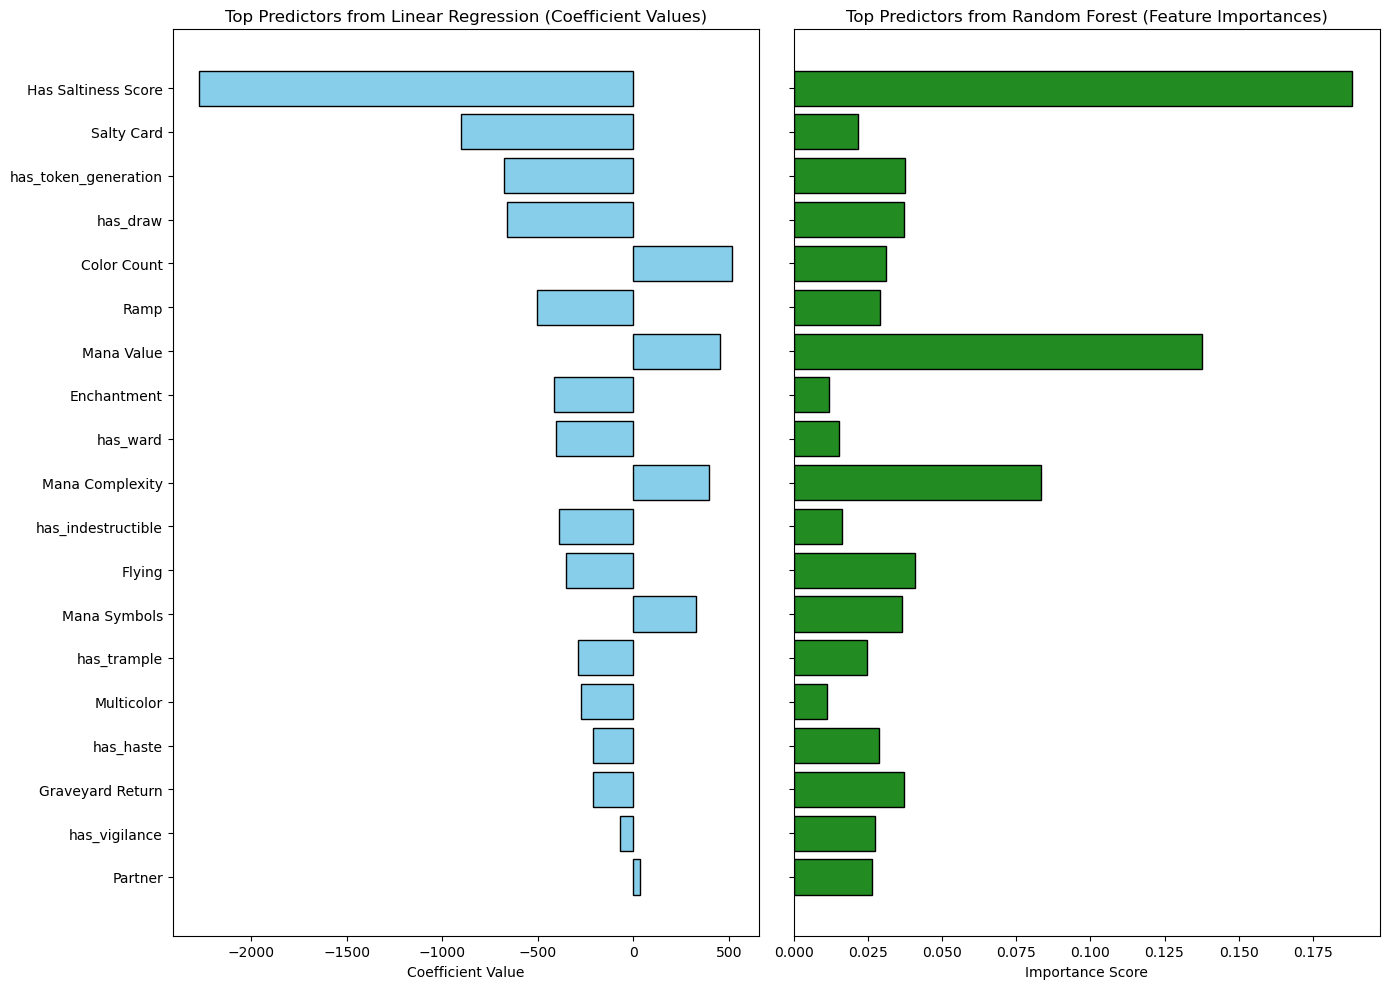

In [78]:

# import matplotlib.pyplot as plt
# import pandas as pd

# Give keyword abilities pretty names.  Makes translation better. 
pretty_names = {
    'mana_symbol_total': 'Mana Symbols',
    'mana_complexity': 'Mana Complexity',
    'manaValue': 'Mana Value',
    'is_salty': 'Salty Card',
    'is_planeswalker': 'Planeswalker',
    'is_multicolor': 'Multicolor',
    'is_monocolor': 'Monocolor',
    'is_enchantment': 'Enchantment',
    'is_creature': 'Creature',
    'has_tutor': 'Tutor',
    'has_saltiness': 'Has Saltiness Score',
    'has_ramp': 'Ramp',
    'has_partner': 'Partner',
    'has_mill': 'Mill',
    'has_lose_life': 'Lose Life',
    'has_lifelink': 'Lifelink',
    'has_graveyard_return': 'Graveyard Return',
    'has_gain_life': 'Gain Life',
    'has_flying': 'Flying',
    'has_exile': 'Exile',
    'has_draw_card': 'Draw Card',
    'has_create_treasure': 'Create Treasure',
    'color_count': 'Color Count'
}

# Create series from model outputs
lr_coefficients = pd.Series(linear_model.coef_, index=X.columns)
rf_importance = pd.Series(rf_model.feature_importances_, index=X.columns)

# Limit to top N based on importance or coefficient magnitude
top_n = 15
top_lr = lr_coefficients.abs().sort_values(ascending=False).head(top_n)
top_rf = rf_importance.sort_values(ascending=False).head(top_n)

# Union of top features from both models
top_features = list(set(top_lr.index).union(set(top_rf.index)))

# Subset and rename
lr_subset = lr_coefficients[top_features].rename(index=pretty_names)
rf_subset = rf_importance[top_features].rename(index=pretty_names)

# Align order (based on LR abs values for consistency)
ordered_features = lr_subset.abs().sort_values().index

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 10), sharey=True)

# Linear Regression
axes[0].barh(ordered_features, lr_subset[ordered_features], color='skyblue', edgecolor='black')
axes[0].set_title('Top Predictors from Linear Regression (Coefficient Values)', fontsize=12)
axes[0].set_xlabel('Coefficient Value')

# Random Forest
axes[1].barh(ordered_features, rf_subset[ordered_features], color='forestgreen', edgecolor='black')
axes[1].set_title('Top Predictors from Random Forest (Feature Importances)', fontsize=12)
axes[1].set_xlabel('Importance Score')

# Formatting
for ax in axes:
    ax.tick_params(axis='y', labelsize=10)
    ax.invert_yaxis()

plt.tight_layout()
plt.show()


**Summary of Feature Importance Results**  
This visual compares the top predictors of Commander card popularity (as measured by EDHREC Rank) based on Linear Regression coefficients and Random Forest feature importances.

**Key Insights**

- Has Saltiness Score and Salty Card emerge as the strongest predictors in both models. Cards with known high "salt" scores (those that frustrate or disrupt opponents) are consistently associated with higher popularity, indicating their strong strategic or emotional impact on gameplay.
- Card Type flags, such as Monocolor, Creature, and Enchantment, also carry substantial predictive power. These traits reflect common Commander deck-building archetypes and synergies.
- Functional abilities like Draw Card, Flying, and Lifelink appear as moderate predictors. These provide tactical advantages and are likely desirable among players building consistent decks.
- Random Forest highlights Mana Value and Mana Complexity more strongly than Linear Regression. This suggests that nonlinear interactions (e.g., between cost and color identity) play a meaningful role in popularity.
- Some features, such as Create Treasure and Graveyard Return, rank modestly across both models, showing niche value depending on deck themes.
- Overall, both models reinforce that cards with interactive, disruptive effects and solid color or type identities tend to rise in Commander popularity. The agreement between models on several key predictors (e.g., saltiness, monocolor identity) enhances confidence in these findings.


SHAP (SHapley Additive exPlanations) is a model-agnostic explainability tool that interprets the output of machine learning models. It can be used in Python by importing the SHAP module and provides clear visualizations of how each feature contributes to a model’s predictions.
In this project, I used SHAP to analyze the Random Forest regression model and highlight which features had the greatest impact on predicting a Commander card’s popularity. This helped identify the most influential card-level traits, such as mana value, keyword abilities, and color identity.

In [80]:
# Run Shap explainer 
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)
print('SHAPE Values Complete')

SHAPE Values Complete


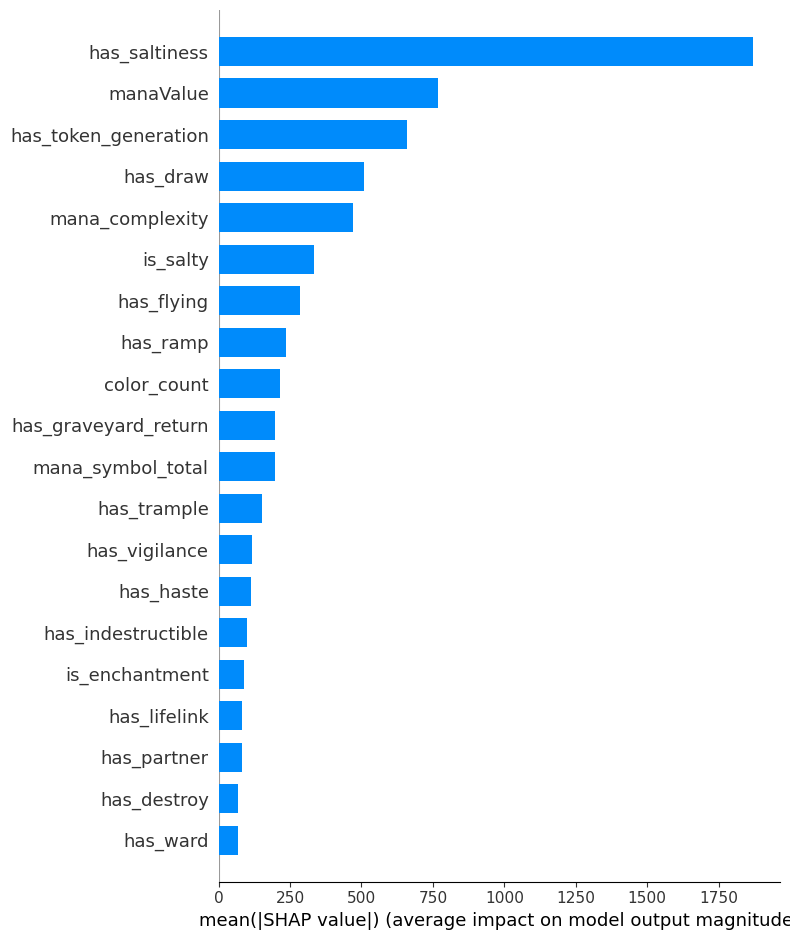

In [82]:
# Step 3: SHAP bar plot (mean absolute SHAP values)
shap.summary_plot(shap_values, X_test, plot_type="bar")

The SHAP summary plot shows the average impact of each feature on the model’s output,
providing a clear view of which factors most influence the predicted Commander popularity.  
- has_saltiness is by far the most impactful feature. This confirms that community perception,
as measured by EDHREC’s saltiness metric, plays a major role in predicting popularity.
- manaValue, is_salty, and color_count follow as moderately strong predictors, showing that
card cost, perceived saltiness, and number of colors influence a commander's appeal.
Traits such as has_flying, has_graveyard_return, and is_monocolor have modest impact,
- while abilities like has_partner, has_indestructible, and has_lifelink appear to have relatively
low predictive power in this model.

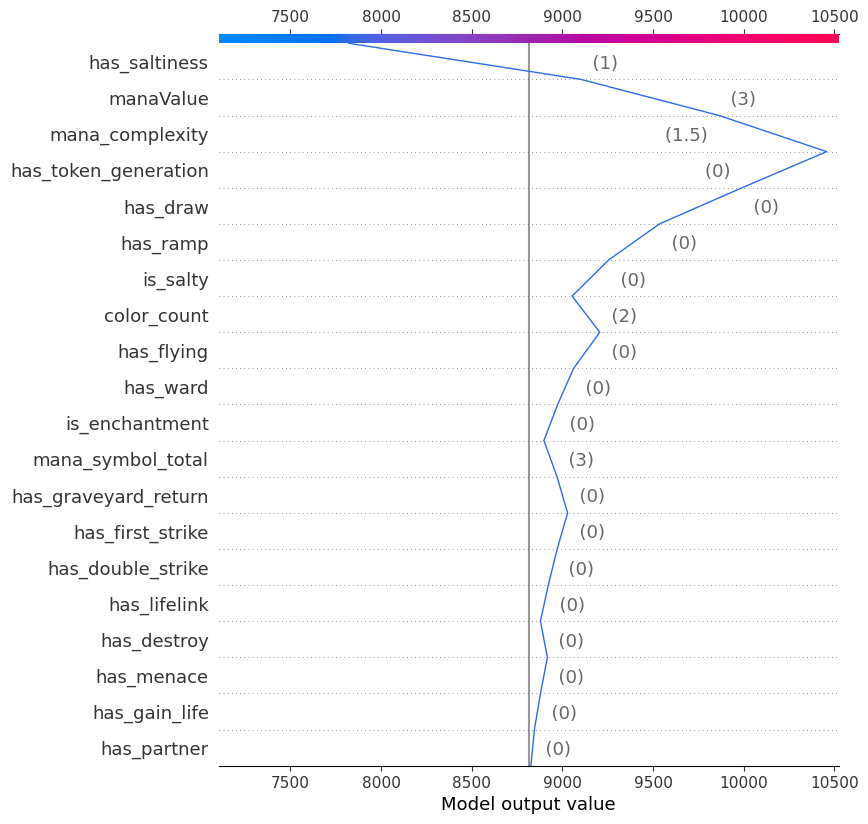

In [85]:
# SHAP Decision PLot
row_idx = 5
shap.decision_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values[row_idx],
    features=X_test.iloc[row_idx],
    feature_names=list(X_test.columns)
)

The plot reflects a single prediction explanation,showing which features pushed the prediction higher or lower compared to the model's average output for one single commander card.

Key observations:

- has_saltiness had the most significant impact on reducing the model output value (i.e., leading to a better rank). This suggests that cards perceived as "salty" may paradoxically be associated with higher popularity or competitiveness in Commander.  
- manaValue, mana_complexity, and mana_symbol_total all contributed positively to the output, meaning higher values pushed the ranking higher (i.e., less favorable), indicating that simpler or cheaper cards tend to perform better.  
- Token generation (has_token_generation), draw, and ramp abilities had negligible or zero contribution in this particular prediction, though they are often important in gameplay.  
- Traits like color_count, has_flying, is_salty, and various keyword abilities (e.g., has_lifelink, has_first_strike) showed very minor or no measurable impact in this specific instance.

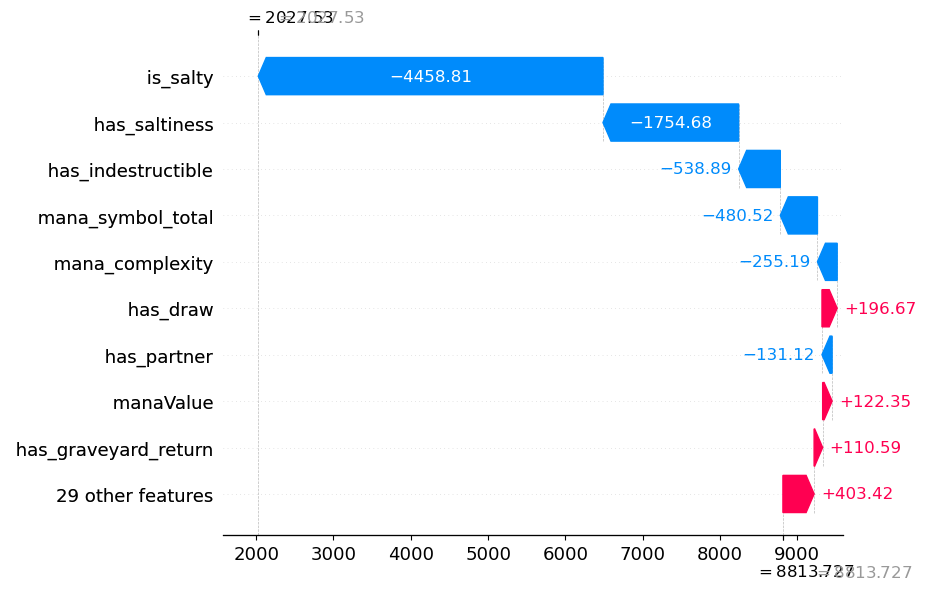

In [88]:
# SHAP Waterfall

# Ensure X_test is a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Get predictions
preds = rf_model.predict(X_test)
top_idx = np.argmin(preds)

# Handle scalar base value properly
base_value = explainer.expected_value[0] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value

# Plot the waterfall
shap.plots._waterfall.waterfall_legacy(
    base_value,
    shap_values[top_idx],
    X_test_df.iloc[top_idx]
)

This SHAP waterfall plot explains the prediction for a ong MTVG Card, showing how each feature contributed to shifting the model output from the base value to the final prediction.

Biggest negative contributions (features that made the card rank better)
- is_salty: −4458.81 Created a strong influence on improving predicted rank.
- has_saltiness: −1754.68 Suggests the card is perceived as intense or controversial, which may boost its popularity.
- as_indestructible, mana_symbol_total, and mana_complexity: also contributed to a lower rank.

Positive contributions (features that made the rank worse):
- has_graveyard_return: +403.42
- manaValue: +110.59
- has_partner: +122.35
- The bar labeled “29 other features” indicates the remaining features had only minor influence on the prediction in aggregate.




**Final Summary**  
This project set out to answer a deceptively simple question: What makes a strong Commander card in Magic: The Gathering? By blending gameplay expertise with structured data and machine learning, the analysis uncovered traits that consistently correlate with popularity among EDHREC-ranked commanders.  

Through descriptive statistics, feature engineering, and SHAP-based explainability, several key patterns emerged. Commanders with lower mana values and streamlined color identities—especially monocolor or two-color—tend to be more popular, suggesting that accessibility and efficiency often outweigh complexity. Likewise, gameplay traits such as card draw, ramp, and token generation stood out as common features of top-performing commanders, underscoring the value of resource acceleration and board presence in the format.   

From a modeling perspective, both models offered limited predictive power, Random Forest regressor provided clearer insights into which features drive popularity. SHAP visualizations made these insights transparent, showing how specific traits push individual commanders toward higher or lower popularity rankings.  

That said, while predicting exact EDHREC rank proved challenging likely due to external factors such as social trends and card availability a binary classification approach may offer a more practical and accurate framework for future analysis.  

Ultimately, while Commander remains a socially-driven and creatively open-ended format, this analysis provides a quantifiable foundation for identifying strong commander traits. For deck builders, it offers data-backed guidance for smarter card selection. For designers and players alike, it demonstrates how data science can complement intuition—illuminating the deeper patterns that continue to shape Magic's most dynamic format.